<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Gender_Female           200 non-null    bool 
dtypes: bool(1), int64(3)
memory usage: 5.0 KB
None


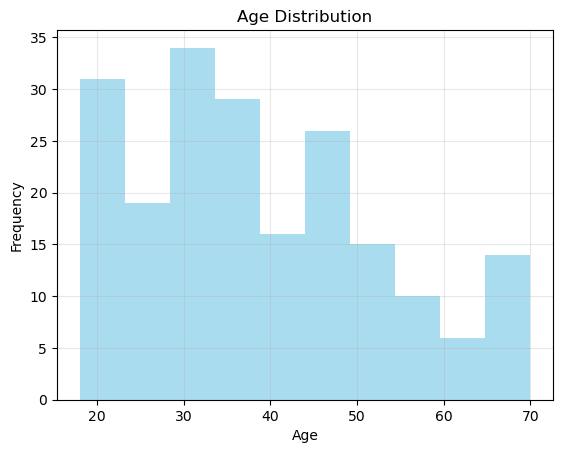

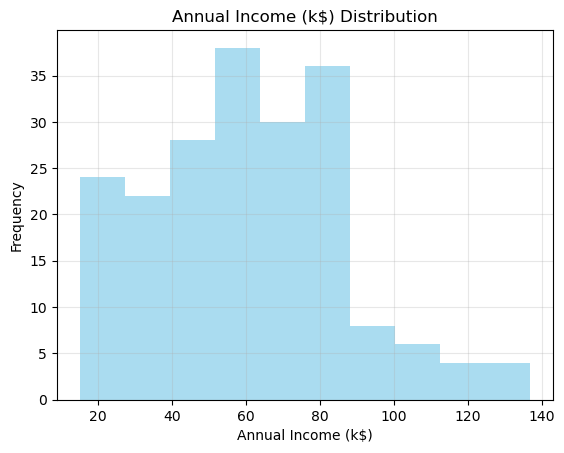

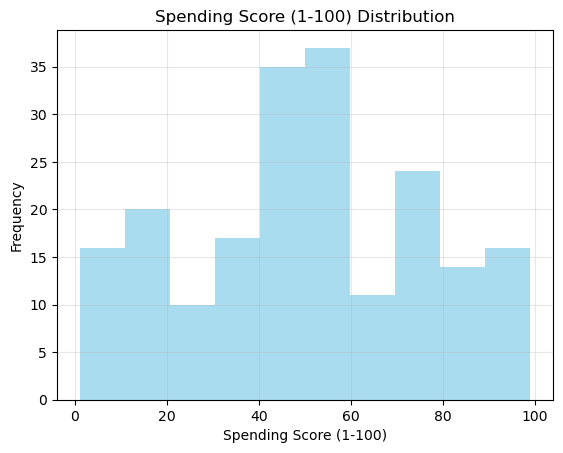

Age:0.48556885096681657
Annual Income (k$):-0.7359971613306433
Spending Score (1-100):-0.047220201374263374
income_age_ratio:0.6346789638670601
score_to_income_ratio:0.30008952777936676
income_spending_interaction:0.22200210645971538
age_spending_interaction:0.09342965011908078
spending_relative_activity:1.0895744061546366
relativeSpending_to_realtiveIncome:2.169888218763582
DiscretionarySpending:0.04950826726472274
Income Percentile:-0.00039624836577874814
Spending Percentile:4.290270488053641e-05
Income_Deviation:-0.7359971613306411
Spending_Deviation:-0.04722020137426329
   Gender_Female age_group Annual Income (k$)_group  \
0          False  Teenager                      Low   
1          False     Adult                      Low   
2           True     Adult                      Low   
3           True     Adult                      Low   
4           True     Adult                      Low   

  Spending Score (1-100)_group       Age  Annual Income (k$)  \
0                       

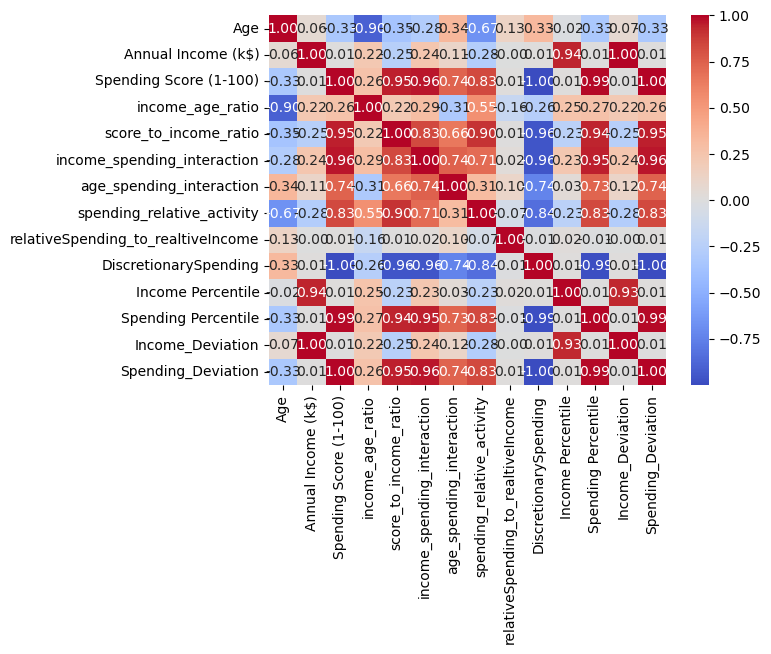

C:\Users\HRISHITHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HRISHITHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HRISHITHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HRISHITHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memor

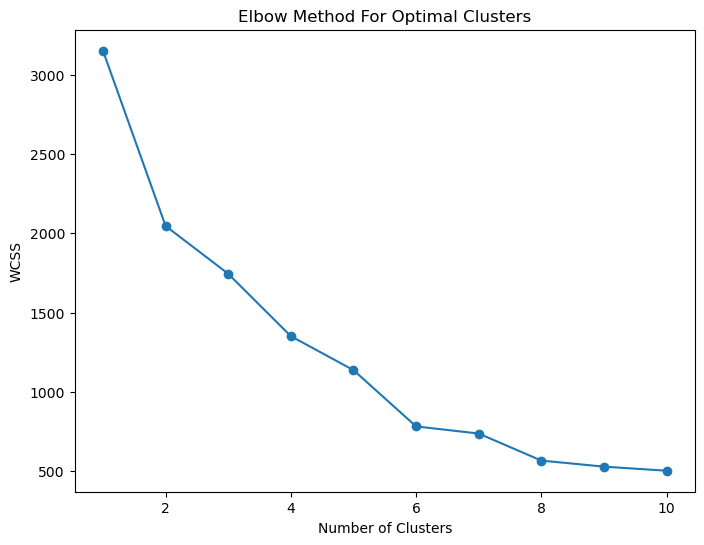

C:\Users\HRISHITHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HRISHITHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HRISHITHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HRISHITHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memor

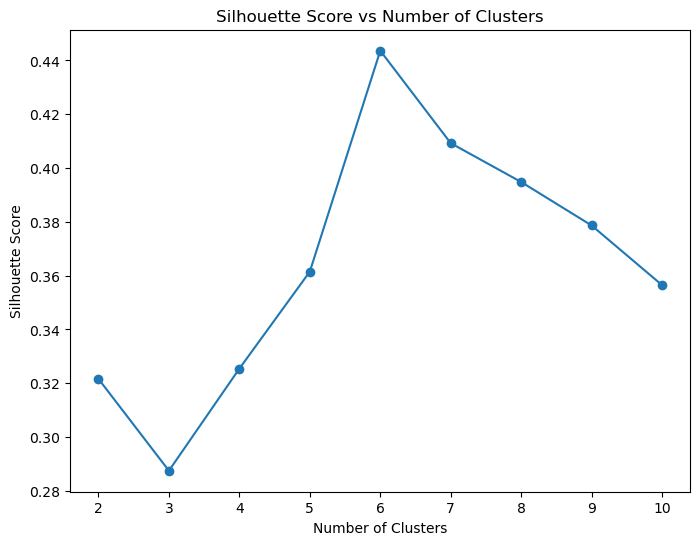

Optimal number of clusters based on silhouette score: 6


C:\Users\HRISHITHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Data loading
df=pd.read_csv(r"C:\Users\HRISHITHA\OneDrive\Desktop\SKILLCRAFT\PROJECT_02\Mall_Customers (1).csv")

# DATA PREPROCESSING
df=pd.get_dummies(df,['Gender']).drop(['Gender_Male','CustomerID'],axis=1)
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)
print(df.info())

# Column Visualisation
for col in df.select_dtypes(include=['number']).columns:
    df[col].plot(kind='hist', bins=10, color='skyblue', alpha=0.7)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(alpha=0.3)
    plt.show()
    
# handling outliers/skewness based on graph
df['Annual Income (k$)']=np.log1p(df['Annual Income (k$)'])

# feature extraction
df['age_group']=pd.cut(df['Age'],bins=[11,19,59,100],labels=['Teenager','Adult','Senior'],ordered=True)
for cols in ['Annual Income (k$)','Spending Score (1-100)']:
    low=df[cols].quantile(0.33)
    mid=df[cols].quantile(0.66)
    df[f'{cols}_group']=pd.cut(df[cols],bins=[0,low,mid,df[cols].max()],labels=['Low','medium','high'],ordered=True)
df['income_age_ratio']=df['Annual Income (k$)']/df['Age']
df['score_to_income_ratio']=df['Spending Score (1-100)']/df['Annual Income (k$)']
df['income_spending_interaction']=df['Annual Income (k$)']*df['Spending Score (1-100)']
df['age_spending_interaction']=df['Spending Score (1-100)']*df['Age']
df['spending_relative_activity']=df['Spending Score (1-100)']/(df['Annual Income (k$)']*df['Age'])
df['relativeSpending_to_realtiveIncome']=(df['Spending Score (1-100)']-df['Spending Score (1-100)'].median())/(df['Annual Income (k$)']-df['Annual Income (k$)'].mean())
df['DiscretionarySpending']=df['Annual Income (k$)']-df['Spending Score (1-100)']
df['Income Percentile'] = df['Annual Income (k$)'].rank(pct=True)
df['Spending Percentile'] = df['Spending Score (1-100)'].rank(pct=True)
df['Income_Deviation'] = df['Annual Income (k$)'] - df['Annual Income (k$)'].mean()
df['Spending_Deviation'] = df['Spending Score (1-100)'] - df['Spending Score (1-100)'].median()

# Skewness
skewed_cols=[]
number_cols=df.select_dtypes(include=['number']).columns.tolist()
for cols in number_cols:
    print(f"{cols}:{df[cols].skew()}")
    if(df[cols].skew()>0.5 or df[cols].skew()<-0.5):
        skewed_cols.append(cols)
if(len(skewed_cols)!=0):
    for i in skewed_cols:
        min_value = df[i].min()
        if min_value <= 0:
            shift_value = abs(min_value) + 1 
            df[i] = np.log1p(df[i] + shift_value) 
        else: 
            df[i] = np.log1p(df[i])
            
# Scaling
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df[number_cols]),columns=number_cols)
frames = [df.drop(number_cols,axis=1), df_scaled]
data= pd.concat(frames,axis=1)
print(data.head())

# Non-numeric data type columns
for col in data.select_dtypes(include=['category', 'object']):
    data[col] = data[col].astype('category').cat.codes

# EDA
correlation_matrix = data[number_cols].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Elbow method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) 
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss,marker='o')
plt.title('Elbow Method For Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show() 

# silhouette_scores
silhouette_scores = []
for i in range(2, 11):  # Cluster range from 2 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


optimal_clusters = np.argmax(silhouette_scores) + 2
print(f"Optimal number of clusters based on silhouette score: {optimal_clusters}")

# KMeans Clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(data)
data['Cluster'] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# CLUSTER SUMMARY
cluster_summary = data.groupby('Cluster').mean()
cluster_summary_str = cluster_summary.to_string()
with open('cluster_summary.txt', 'w') as f:
    f.write(cluster_summary_str)
sns.pairplot(data, hue="Cluster", palette="Set2")
plt.show()

# clusters in 3D pca space
# linear dimension capture
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(data)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],c=data['Cluster'], cmap='viridis', s=50)
ax.set_title("Clusters in 3D PCA Space")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.colorbar(scatter, label='Cluster')
plt.show()

# t-sne plot
# non-linear dimension capture
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(data)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

sil_score = silhouette_score(data, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.2f}")

data.to_csv("clustered_data.csv", index=False)